# Pymaceuticals Inc.
---

### Analysis

In this study, there were 248, not 249 mice being screened for potential treatments for squamous cell carcinoma (SCC), which is a common skin cancer. Tumor development was being measured and observed over the course of 45 days. Pymaceuticals Inc. was testing Capomulin compared to other drug regimens. After the testing results, my findings were that Ramicane was the most successful treatment in slowing and in some cases decreasing tumor volume. Each mouse's tumor started with a volume of 45 (mm3). While the most successful drug regimen was Ramicane, Capomulin came in as a very close second. The study was conducted on nearly an equal male to female mice ratio.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousestudy_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(mousestudy_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_df.loc[mousestudy_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousestudy_df.loc[mousestudy_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmousestudy_df = mousestudy_df.loc[mousestudy_df["Mouse ID"] != "g989"]
cleanmousestudy_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
len(cleanmousestudy_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
averageregimen = cleanmousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medianregimen = cleanmousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varianceregimen = cleanmousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdregimen = cleanmousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semregimen = cleanmousestudy_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summaryregimen_df = pd.DataFrame({"Mean Tumor Volume" : averageregimen,
                                                                "Median Tumor Volume" : medianregimen,
                                                                 "Tumor Volume Variance" : varianceregimen,
                                                                  "Tumor Volume Std. Dev." : stdregimen,
                                                                   "Tumor Volume Std. Err." : semregimen})
summaryregimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summarynewregimen_df = cleanmousestudy_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
summarynewregimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

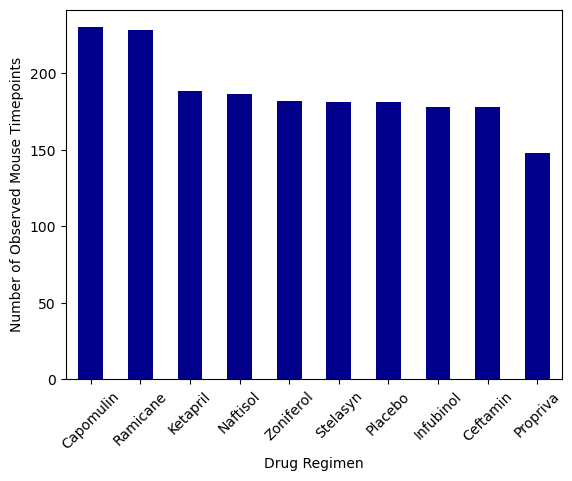

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Grouping by "Drug Regimen" and counting the number of rows for each group
regimen_counts = cleanmousestudy_df["Drug Regimen"].value_counts().reset_index(name="Count")

#Plotting with Pandas
regimen_counts.plot(kind="bar", x="Drug Regimen", y="Count", legend=False, color="darkblue")
plt.ylabel("Number of Observed Mouse Timepoints")

#This will make the drug names easier to read
plt.xticks(rotation=45)

#print
plt.show()

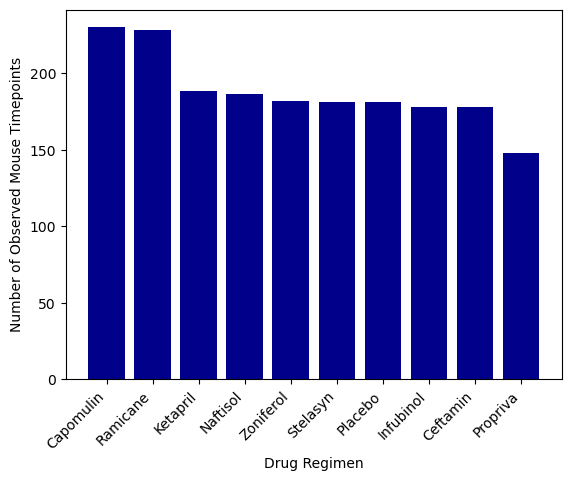

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Grouping by "Drug Regimen" and counting the number of rows for each group
regimen_counts = cleanmousestudy_df["Drug Regimen"].value_counts().reset_index(name="Count")

#Plotting with Pyplot instead
plt.bar(regimen_counts.index, regimen_counts["Count"], color="darkblue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")


#This will make the drug names easier to read
plt.xticks(regimen_counts.index, regimen_counts["Drug Regimen"], rotation=45, ha="right")

#print
plt.show()

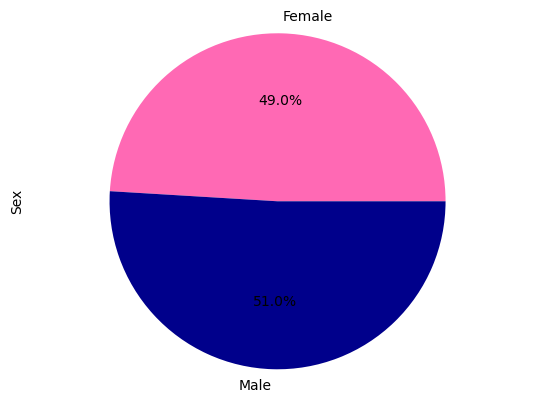

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#"Sex" stores the gender of mouse
groupby_sex = cleanmousestudy_df.groupby("Sex")

#We are counting how many times each road type occurred in the group
sex_counts = groupby_sex["Sex"].count()

#Configuring the pie chart
gender_piechart = sex_counts.plot(kind="pie", y="Sex", autopct="%1.1f%%", legend=False, colors=["hotpink", "darkblue"])

#Making sure it is round
plt.axis("equal")

plt.show()

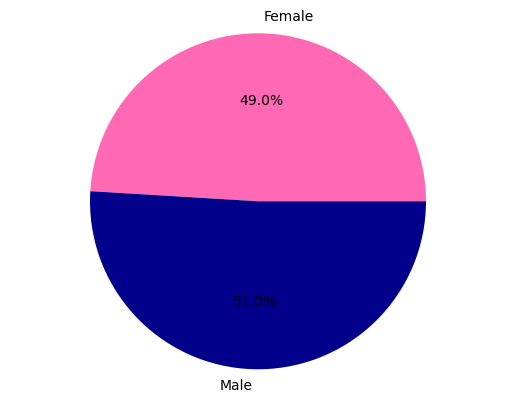

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#"Sex" stores the gender of mouse
groupby_sex = cleanmousestudy_df.groupby("Sex")

#We are counting how many times each road type occurred in the group
sex_counts = groupby_sex["Sex"].count()

#Configuring the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", colors=["hotpink", "darkblue"])

#Making sure it is round
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin list
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# isin function https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
filtered_df = cleanmousestudy_df[cleanmousestudy_df['Drug Regimen'].isin(drug_regimens)]

# Get the last timepoint for each mouse
max_timepoint_df = pd.DataFrame(filtered_df.groupby(["Mouse ID"])["Timepoint"].max())

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(filtered_df, max_timepoint_df, on=["Mouse ID", "Timepoint"], how="right")

# Display the resulting DataFrame
final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [17]:
# Put treatments into a list for a for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment regimen
for regimen in selected_regimens:
    # Filter data for the current regimen
    regimen_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]
    
    # Get tumor volumes for the current regimen
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    
    # Append tumor volumes to the list for plotting
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = regimen_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print results
    print(f"Regimen: {regimen}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    # The function for tolist https://www.geeksforgeeks.org/python-pandas-series-tolist/
    print(f"Potential Outliers: {outliers['Tumor Volume (mm3)'].tolist()}\n")

Regimen: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Regimen: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Regimen: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Regimen: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



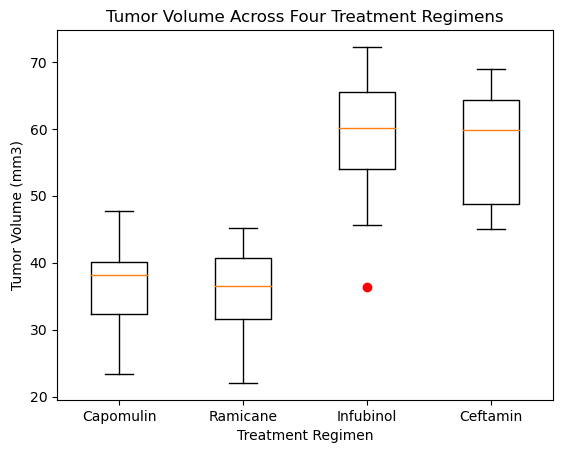

In [16]:
plt.boxplot(tumor_vol_data, labels=selected_regimens, sym='ro')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

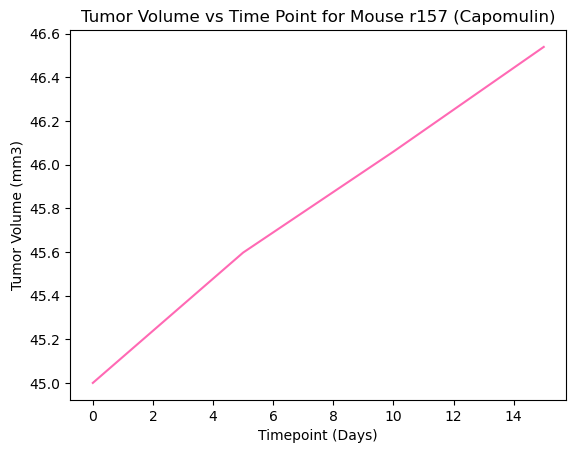

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ID = 'r157'

#Here I am filtering for the specific mouse 'i557' treated with Capomulin
mouse_data = cleanmousestudy_df[(cleanmousestudy_df['Drug Regimen'] == 'Capomulin') & (cleanmousestudy_df['Mouse ID'] == mouse_ID)]

#Here I am beginning to plot the line
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='hotpink')

# Adding labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs Time Point for Mouse {mouse_ID} (Capomulin)')

# Show the plot
plt.show()


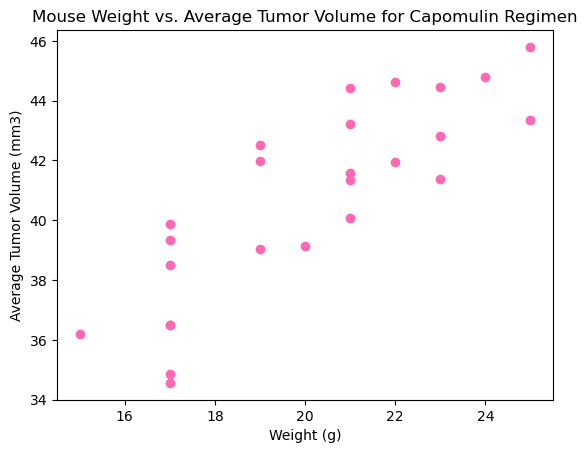

In [41]:
# Filter data for the Capomulin regimen
capomulin_data = cleanmousestudy_df[cleanmousestudy_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with the mouse weight but get rid of duplicates created from the merge using merg plus drop duplicates function:
#https://stackoverflow.com/questions/39019591/duplicated-rows-when-merging-dataframes-in-python
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID', how='inner')

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', facecolors='hotpink')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


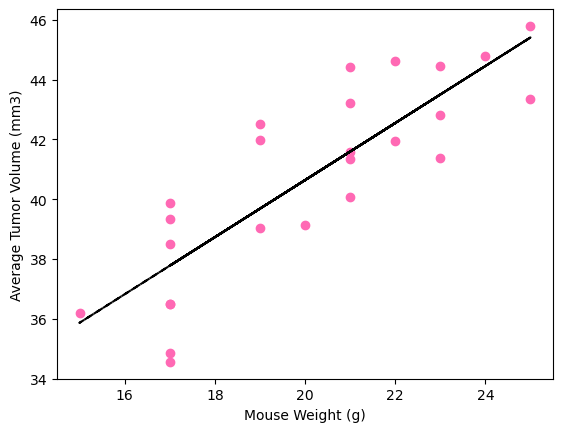

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin regimen
capomulin_data = cleanmousestudy_df[cleanmousestudy_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse weight
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID', how='inner')

# Calculate the correlation coefficient
x = merged_data['Weight (g)']
y = merged_data['Tumor Volume (mm3)']

# Calculate mean values
mean_x = x.mean()
mean_y = y.mean()

# Calculate covariance and variances
cov_xy = ((x - mean_x) * (y - mean_y)).sum()
var_x = ((x - mean_x) ** 2).sum()
var_y = ((y - mean_y) ** 2).sum()

#Actual calculation for the correlation coefficient
correlation_coefficient = cov_xy / (var_x * var_y) ** 0.5

# Print the rounded correlation coefficient
rounded_correlation_coefficient = round(correlation_coefficient, 2)

print(f'The correlation between mouse weight and the average tumor volume is {rounded_correlation_coefficient}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', facecolors='hotpink')

# Add the regression line to the plot
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()